# <FONT COLOR='red'>**_OVERALL DESCRIPTION_**</FONT>

---
---

The purpose of this notebook is to create and train a model based on RNN (Recurrent Neural Networks) in a Google Colab environment to obtain a model that can correctly classify elephant and mouse flows from DCN traffic traces using a UNIV1 data set.

## <FONT COLOR = 'gray'>**IMPORT MODEL LIBRARIES**</FONT>

---

Next, we need import some libraries to use the model.

1. `import tensorflow as tf`: TensorFlow is an open source library for numerical computing and deep learning developed by Google. It is widely used to build and train machine learning models and neural networks.
2. `from tensorflow.keras.models import Sequential`: Sequential is a class of Keras, which is a high-level API for building neural network models. Sequential allows you to create models in the form of a linear stack of layers, which is useful for building simple and straightforward models.
3. `from tensorflow.keras.layers import GRU, Dense, Dropout`: `GRU` (Gated Recurrent Unit) and `Dense` are capable types that can be implemented within neural networks to process sequences. `GRU` is similar to LSTM (Long Short-Term Memory) whose main characteristics lie in performance and the solution of a classic RNN problem related to the memory of its gradients; On the other hand, `Dense` is a layer that allows each of its neurons to be completely connected to the neurons of the previous layer. Finally there is `Dropout` which is a regularization technique used to prevent overfitting in neural networks. During training, some neurons are randomly deactivated at each step, forcing the network to learn more robust representations.
4. `from tensorflow.keras.regularizers import L2`: `L2` is a form of regularization that penalizes large values of weights in a neural network. It helps prevent overfitting by adding a penalty to the training error based on the magnitude of the weights.
5. `from tensorflow.keras.optimizers import Adam`: It corresponds to an adaptive optimizer that adjusts the weights of the neural network during training. It combines the advantages of other optimizers such as AdaGrad and RMSProp, and is very popular due to its effectiveness and efficiency.
6. `from tensorflow.keras.metrics import Precision, Recall`:Libraries to implement the `Precision` and `Recall` metrics within the training cycle, allowing the learning growth of the models to be evident.
7. `from tensorflow.keras import backend as K`: `backend` renamed `K` for use in code, is the Keras interface to the backend. It allows low-level operations to be performed directly on tensors and variables, which is useful for customizing specific aspects of model training, in our case the inclusion of metrics during the training cycle.
8. `from tensorflow.keras.losses import Loss`: Base class for defining custom loss functions in Keras. Loss functions are used to evaluate how well the model is performing during training, that is, how well it is learning.
9. `from sklearn.model_selection import train_test_split`: It corresponds to a scikit-learn function used to split a data set into two subsets: one for training and one for testing. This feature is essential for evaluating the performance of a model objectively, ensuring that it is trained on one data set and evaluated on a separate set.
10. `from sklearn.preprocessing import StandardScaler, LabelEncoder`: The `StandardScaler` library is a feature normalization tool based on a normal distribution with mean 0 and variance 1; To accompany it, `LabelEncoder` is used, which transforms categorical labels into numerical values.
11. `from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix`: By importing `accuracy_score` you access the function that calculates the accuracy (Proportion of correct predictions over the total predictions made); when `precision_score` is imported, the function that calculates the precision (Proportion of TP over total predicted positives[TP+FP]) is accessed; when you import `f1_score`, you access the function that calculates the F1 score, which is the harmonic mean of precision and recall. Finally by importing `confusion_matrix` you can generate a confusion matrix showing the number of true positives, false positives, true negatives and false negatives.

## <FONT COLOR = 'gray'>**IMPORT GRAPHIC LIBRARIES**</FONT>

---

Next, we need import some libraries to create graphics.
1. `import matplotlib.pyplot as plt`: Python plotting library, `pyplot` is a module of `matplotlib` that provides a MATLAB-like interface for creating plots. It allows you to create a wide variety of graphs such as line, bar, scatter, histograms, among others. Generally renamed to `plt` for ease of use in code.
2. `import seaborn as sns`: It allows the visualization of statistical data in a more attractive way; the library is characterized by allowing an easy creation of the same. It is usually renamed with `sns` to improve its usability in the code.

## <FONT COLOR = 'gray'>**IMPORT DATA ANALYSIS LIBRARIES**</FONT>

---

Next, we need import some libraries to data analysis graphics.
5. `import pandas as pd`: An essential component for data analysis and manipulation in Python, it provides data structures such as Series (one-dimensional) and DataFrames (two-dimensional) that allow you to handle tabular data with ease.
6. `import numpy as np`:Fundamental component for numerical computation in Python, as it provides support for multidimensional arrays and matrices, as well as a large collection of mathematical functions to operate on these arrays.

In [ ]:
# IMPORT MODEL LIBRARIES
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import backend as K
from tensorflow.keras.losses import Loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# IMPORT GRAPHIC LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA ANALYSIS LIBRARIES
import pandas as pd
import numpy as np

## <FONT COLOR = 'orange'>**LOAD DATASET**</FONT>

---

We will use the UNIV1 dataset which is a modification of the UNI1 dataset, which contains traffic traces from several DCNs collected by a university in 2010. The traffic traces in the dataset are only IPv4.

UNIV1 contain the follow structure:

1. `start_time`: Represent the beginning of the capture per flow.
2. `end_time`: Represent the finish of the capture per flow.
3. `ip_src`: Represent the source IPv4.
4. `ip_dst`: Represent the destination IPv4.
5. `ip_proto`: Represent the IP protocol used.
6. `port_src`: Represent the source port.
7. `port_dst`: Represent the destination port.
8. `size_pkt1`: Represent the size of the packet 1.
9. `size_pkt2`: Represent the size of the packet 2.
10. `size_pkt3`: Represent the size of the packet 3.
11. `size_pkt4`: Represent the size of the packet 4.
12. `size_pkt5`: Represent the size of the packet 5.
13. `size_pkt6`: Represent the size of the packet 6.
14. `size_pkt7`: Represent the size of the packet 7.
15. `iat_pkt2`: Represent the inter arrive time of the packet 2.
16. `iat_pkt3`: Represent the inter arrive time of the packet 3.
17. `iat_pkt4`: Represent the inter arrive time of the packet 4.
18. `iat_pkt5`: Represent the inter arrive time of the packet 5.
19. `iat_pkt6`: Represent the inter arrive time of the packet 6.
20. `iat_pkt7`: Represent the inter arrive time of the packet 7.
21. `tot_size`: Represent the total size per flow.
22. `flow_type`: Represent the flow type as elephant or mice.

In [ ]:
# UNIV1 DATASET ID
id = '1Nt4A7U0P_2x7VYfX0T7Tr21tt3CHIREl'

# GENERATE THE DOWNLOAD URL
url_univ1 = f'https://drive.google.com/uc?id={id}'

# DOWNLOAD AND LOAD UNI1 DATASET IN A DATAFRAME OF PANDAS
univ1_df = pd.read_csv(url_univ1)
univ1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73256 entries, 0 to 73255
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start_time  73256 non-null  int64 
 1   end_time    73256 non-null  int64 
 2   ip_src      73256 non-null  int64 
 3   ip_dst      73256 non-null  int64 
 4   ip_proto    73256 non-null  int64 
 5   port_src    73256 non-null  int64 
 6   port_dst    73256 non-null  int64 
 7   size_pkt1   73256 non-null  int64 
 8   size_pkt2   73256 non-null  int64 
 9   size_pkt3   73256 non-null  int64 
 10  size_pkt4   73256 non-null  int64 
 11  size_pkt5   73256 non-null  int64 
 12  size_pkt6   73256 non-null  int64 
 13  size_pkt7   73256 non-null  int64 
 14  iat_pkt2    73256 non-null  int64 
 15  iat_pkt3    73256 non-null  int64 
 16  iat_pkt4    73256 non-null  int64 
 17  iat_pkt5    73256 non-null  int64 
 18  iat_pkt6    73256 non-null  int64 
 19  iat_pkt7    73256 non-null  int64 
 20  tot_si

In [ ]:
# PRESENTATION OF AN EXAMPLE OF THE DATA
pd.set_option('display.max_columns', None)
display(univ1_df.head())

,start_time,end_time,ip_src,ip_dst,ip_proto,port_src,port_dst,size_pkt1,size_pkt2,size_pkt3,size_pkt4,size_pkt5,size_pkt6,size_pkt7,iat_pkt2,iat_pkt3,iat_pkt4,iat_pkt5,iat_pkt6,iat_pkt7,tot_size,flow_type
0,1261067166249838,1261067166272053,411772655,2443160248,6,80,43521,66,64,275,1518,1518,1518,1518,616,6289,14258,22,20,58,10992,mice
1,1261067165656630,1261067171636653,411772615,164247105218,6,80,1506,1518,1518,1518,1518,1518,950,1518,1121030,21,998925,21,31021,50,27138,elephant
2,1261067170895775,1261067171122094,4117798176,41177194186,6,80,1587,66,64,1518,1518,1518,1012,1518,8299,207090,121,125,1971,410,22521,mice
3,1261067173048827,1261067173202738,411772655,2443160248,6,80,43584,66,64,1518,1518,1518,1518,1518,727,151600,21,19,744,20,14904,mice
4,1261067172050638,1261067172468947,411772615,68157168224,6,80,62277,82,70,1518,1518,1518,1518,1518,43584,243392,21,34,43685,33,56918,elephant


## <FONT COLOR = 'orange'>**DATA CLEANING**</FONT>

---

To create any type of ML (Machine Learning) model, it is necessary to clean the data to, in this case, manipulate the records so that their data type is interpretable by the `RNN`, as well as perform the transformation elephant with 1 and mice with 0 in the target prediction field.

In [ ]:
# CONVERT UNIQUE FLOW_TYPE VALUES THAT ARE OBJECT TO NUMERIC
print(f'Unique values of flow_type: {univ1_df["flow_type"].unique()}')
print(f'mice: 0\nelephant: 1\n')
univ1_df['flow_type'] = univ1_df['flow_type'].map({'mice': 0, 'elephant': 1})
print(f'New unique values of flow_type: {univ1_df["flow_type"].unique()}\n')

Unique values of flow_type: ['mice' 'elephant']
mice: 0
elephant: 1

New unique values of flow_type: [0 1]



In [ ]:
# SPLIT THE DATA IN TWO SETS BASE_DATA AND EVALUATION_DATA
seed = 42
base_data, evaluation_data = train_test_split(univ1_df, test_size=0.1, stratify=univ1_df['flow_type'], random_state=seed)

# REVIEW THE DISTRIBUTION OF TAG DATA
print(
  f'''\n\nClass distribution between base_data and evaluation_data.
  \nBase set class distribution: {base_data["flow_type"].value_counts(normalize=True)}.
  \nEvaluation set class distribution: {evaluation_data["flow_type"].value_counts(normalize=True)}\n\n.'''
)



Class distribution between base_data and evaluation_data.
  
Base set class distribution: flow_type
0    0.648855
1    0.351145
Name: proportion, dtype: float64.
  
Evaluation set class distribution: flow_type
0    0.648785
1    0.351215
Name: proportion, dtype: float64

.


In [ ]:
# SPLIT THE DATA IN TWO SETS TRAIN AND TEST
train, test = train_test_split(base_data, test_size=0.3, stratify=base_data['flow_type'], random_state=seed)

# SPLIT THE DATA IN TWO SETS BASE_DATA AND EVALUATION_DATA
print(
  f'''\n\nClass distribution between train and test.
  \nTrain set class distribution: {train["flow_type"].value_counts(normalize=True)}.
  \nTest set class distribution: {test["flow_type"].value_counts(normalize=True)}.'''
)



Class distribution between train and test.
  
Train set class distribution: flow_type
0    0.648848
1    0.351152
Name: proportion, dtype: float64.
  
Test set class distribution: flow_type
0    0.64887
1    0.35113
Name: proportion, dtype: float64.


In [ ]:
# SEPARATION OF TRAIN AND TEST DATASET DATA INTO CHARACTERISTICS AND LABELS
x_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
x_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

In [ ]:
# STANDARDIZATION OF RECORDS
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

In [ ]:
# CONVERT DATA INTO SEQUENCES
X_train_seq = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1])).astype(np.float32)
X_test_seq = x_test.values.reshape((x_test.shape[0], 1, x_test.shape[1])).astype(np.float32)

# MAKE SURE LABELS ARE IN THE CORRECT FORMAT
y_train = y_train.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

## <FONT COLOR = 'orange'>**TRAINING**</FONT>

---

Now is the time to create and train the model with the features of the training data set. The objective is to achieve a fully functional model in the task of binary flow classification that is capable of generalizing the patterns of the records without having to learn them by heart (Overfitting).

In [ ]:
# CONSTRUCT THE FIGURE TO THE CONFUSION MATRIX
def create_cm(conf, title):
  plt.imshow(conf, interpolation = "nearest")
  class_names = [0,1]
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # CREATE A HEATMAP IN TO THE CONFUSION MATRIX
  sns.heatmap(pd.DataFrame(conf), annot=True, cmap=plt.cm.Blues, fmt='g')
  plt.tight_layout()
  plt.title(title)
  plt.xlabel('Predict')
  plt.ylabel('Real')

  plt.tight_layout()
  plt.show()
  plt.close()

# DEFINE A CUSTOM COMPUTE_METRICS FUNCTION
def compute_metrics(y_test, y_pred):
  accu = accuracy_score(y_test, y_pred)
  pres = precision_score(y_test, y_pred)
  f1_s = f1_score(y_test, y_pred)
  conf = confusion_matrix(y_test, y_pred)
  # PRINT THE CONFUSION
  create_cm(conf,'Confusion Matrix')
  # RETURN METRICS
  return {
      'accuracy': accu,
      'precision': pres,
      'f1_score': f1_s
  }

In [ ]:
# CREATE THE CLASS TO EVALUATE CROSS ENTROPY LOSS INTO THE TRAINING.
class CustomCrossEntropyLoss(Loss):
  def __init__(self):
    super(CustomCrossEntropyLoss, self).__init__()

  def call(self, y_true, y_pred):
    loss_fct = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    return loss_fct(y_true, y_pred)

In [ ]:
# CREATE THE FUNCTION TO EVALUATE F1 SCORE INTO THE TRAINING.
def f1_score(y_true, y_pred):
  y_pred = K.round(y_pred)
  tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
  fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
  fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

  precision = tp / (tp + fp + K.epsilon())
  recall = tp / (tp + fn + K.epsilon())
  f1_score = 2 * precision * recall / (precision + recall + K.epsilon())

  return f1_score

In [ ]:
# DEFINE THE OPTIMIZER, LEARNING RATE AND TRAINING METRICS
optimizer = Adam(learning_rate=1e-6)
metrics = ['accuracy', Precision(), f1_score]

# CREATE MODEL
model = Sequential()
model.add(GRU(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2 ,kernel_regularizer=L2(0.01), recurrent_regularizer=L2(0.01),input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(GRU(16, dropout=0.2, recurrent_dropout=0.2 ,kernel_regularizer=L2(0.01), recurrent_regularizer=L2(0.01)))
model.add(Dense(8, activation='relu', kernel_regularizer=L2(0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=L2(0.01)))
model.compile(optimizer=optimizer, loss=CustomCrossEntropyLoss(), metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 32)             5280      
                                                                 
 gru_1 (GRU)                 (None, 16)                2400      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 7825 (30.57 KB)
Trainable params: 7825 (30.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# TRAINING MODEL
history = model.fit(X_train_seq, y_train, epochs=50, batch_size=32, validation_data=(X_test_seq, y_test))

Epoch 1/50
1443/1443 [==============================] - 30s 8ms/step - loss: 2.0119 - accuracy: 0.5909 - precision: 0.4089 - f1_score: 0.3778 - val_loss: 2.0008 - val_accuracy: 0.6005 - val_precision: 0.4154 - val_f1_score: 0.3604
Epoch 2/50
1443/1443 [==============================] - 10s 7ms/step - loss: 1.9885 - accuracy: 0.6104 - precision: 0.4343 - f1_score: 0.3817 - val_loss: 1.9772 - val_accuracy: 0.6310 - val_precision: 0.4650 - val_f1_score: 0.3787
Epoch 3/50
1443/1443 [==============================] - 10s 7ms/step - loss: 1.9652 - accuracy: 0.6291 - precision: 0.4640 - f1_score: 0.3927 - val_loss: 1.9539 - val_accuracy: 0.6569 - val_precision: 0.5174 - val_f1_score: 0.3971
Epoch 4/50
1443/1443 [==============================] - 9s 6ms/step - loss: 1.9423 - accuracy: 0.6492 - precision: 0.5008 - f1_score: 0.4080 - val_loss: 1.9308 - val_accuracy: 0.6867 - val_precision: 0.5933 - val_f1_score: 0.4194
Epoch 5/50
1443/1443 [==============================] - 10s 7ms/step - loss: 

Now we proceed to test the results, the evaluation is carried out in a different environment to avoid problems with the reading of the memory and therefore with the evaluation.

619/619 [==============================] - 2s 2ms/step - loss: 1.0925 - accuracy: 0.8904 - precision: 0.9780 - f1_score: 0.8075
Loss: 1.092544436454773, Accuracy: 0.8903887867927551, Precision: 0.9779868125915527, F1-Score: 0.8074640035629272
619/619 [==============================] - 3s 3ms/step


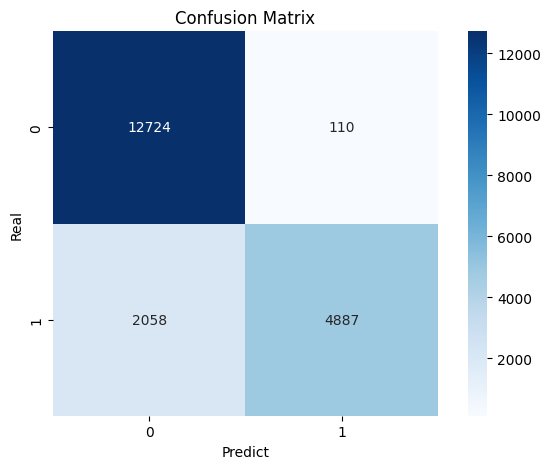

{'accuracy': 0.8903887961979877, 'precision': 0.9779867920752452, 'f1_score': <tf.Tensor: shape=(19779,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.40337417], dtype=float32)>}


In [ ]:
loss, accuracy, precision, f1score = model.evaluate(X_test_seq, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, F1-Score: {f1score}')

# Predicción y evaluación de métricas adicionales
y_pred = (model.predict(X_test_seq) > 0.5).astype("int32")
metrics = compute_metrics(y_test, y_pred)
print(metrics)